# Black Friday Analysis

#### Initializing packages 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.display.max_columns = 999

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


### 1) Exploratory Data Analysis

In [4]:
#size of the dataset (rows, columns)
train.shape

(550068, 12)

In [5]:
train.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


### Non-graphical Univariate Analysis

In [6]:
#finding unique and duplicate customers

unique_ids = len(set(train.User_ID))
total_ids = train.shape[0]
duplicate_ids = total_ids - unique_ids
print("There are " + str(total_ids) + " total customers.")
print("There are " + str(unique_ids) + " unique customers.")
print("There are " + str(duplicate_ids) + " duplicate customers.")

There are 550068 total customers.
There are 5891 unique customers.
There are 544177 duplicate customers.


In [7]:
#checking the data type and null values of columns

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


### Graphical Univariate Analysis:

##### Distribution of the target variable: Purchase

C:\Users\pradn\Anaconda3\anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Purchase Amount Distribution')

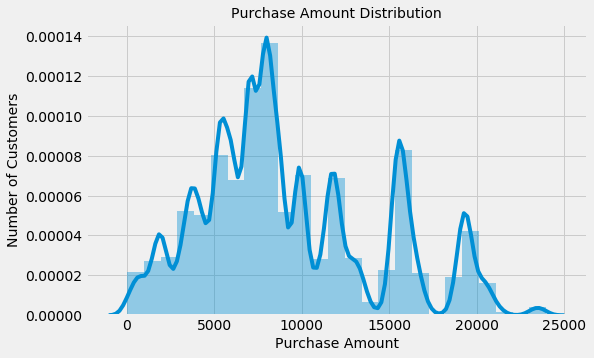

In [8]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(8,5))
sns.distplot(train.Purchase, bins = 25)
plt.xlabel("Purchase Amount", fontsize=14)
plt.ylabel("Number of Customers", fontsize=14)
plt.title("Purchase Amount Distribution", fontsize=14)

In [9]:
print ("Skew is:", train.Purchase.skew())
print("Kurtosis: %f" % train.Purchase.kurt())

Skew is: 0.6001400037087128
Kurtosis: -0.338378


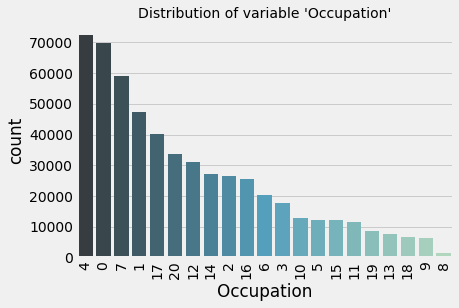

In [10]:
sns.countplot(x = 'Occupation',
              palette = "GnBu_d",
              data = train,
              order = train['Occupation'].value_counts().index)
plt.xticks(rotation=90)
plt.title("Distribution of variable 'Occupation'", fontsize=14)
plt.show()

Text(0.5,1,"Distribution of variable 'Gender'")

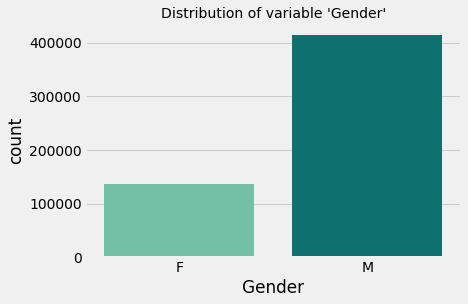

In [11]:
sns.countplot(train.Gender, palette=['#66cdaa', '#008080'])
plt.title("Distribution of variable 'Gender'", fontsize=14)

Text(0.5,1,"Distribution of variable 'Age'")

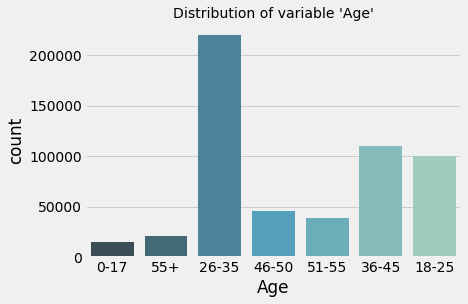

In [12]:
sns.countplot(train.Age, palette = "GnBu_d")
plt.title("Distribution of variable 'Age'", fontsize=14)

In [13]:
train.City_Category.value_counts()

B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

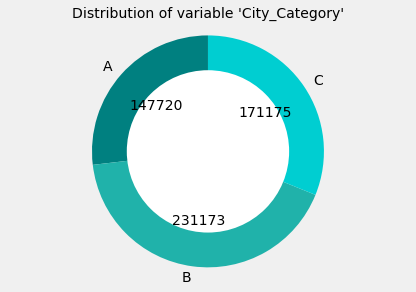

In [14]:
# Donut chart
labels = ['A', 'B', 'C']
sizes = [147720, 231173, 171175]
#colors
colors = ['#008080','#20b2aa','#00ced1']

def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{v:d}'.format(v=val)
    return my_format

fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=labels, autopct=autopct_format(sizes), startangle=90)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that Donut is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.title("Distribution of variable 'City_Category'", fontsize=14)
plt.show()

Text(0.5,1,"Distribution of variable 'Marital status'")

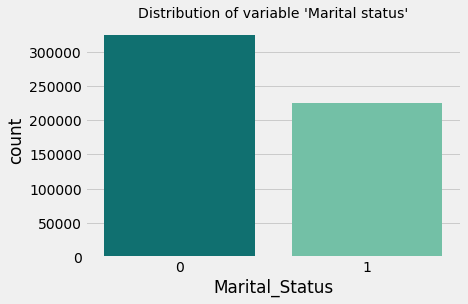

In [15]:
sns.countplot(train.Marital_Status, palette=['#008080', '#66cdaa'])
plt.title("Distribution of variable 'Marital status'", fontsize=14)

In [16]:
train.Stay_In_Current_City_Years.value_counts()

1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64

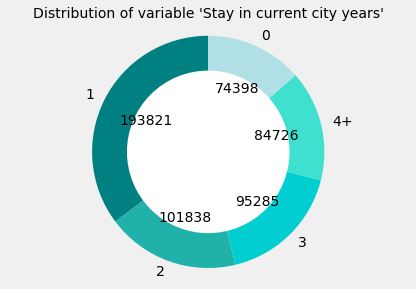

In [17]:
# Donut chart
labels = ['1', '2', '3', '4+', '0']
sizes = [193821, 101838, 95285, 84726, 74398]
#colors
colors = ['#008080','#20b2aa','#00ced1', '#40e0d0', '#b0e0e6']

def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{v:d}'.format(v=val)
    return my_format

fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=labels, autopct=autopct_format(sizes), startangle=90)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that Donut is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.title("Distribution of variable 'Stay in current city years'", fontsize=14)
plt.show()

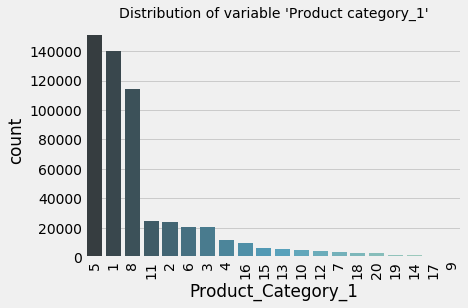

In [18]:
sns.countplot(x = 'Product_Category_1',
              palette = "GnBu_d",
              data = train,
              order = train['Product_Category_1'].value_counts().index)
plt.xticks(rotation=90)
plt.title("Distribution of variable 'Product category_1'", fontsize=14)
plt.show()

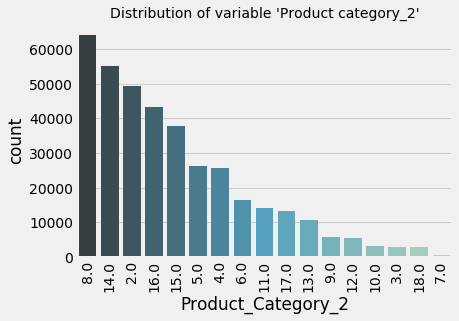

In [19]:
sns.countplot(x = 'Product_Category_2',
              data = train,
              palette = "GnBu_d",
              order = train['Product_Category_2'].value_counts().index)
plt.xticks(rotation=90)
plt.title("Distribution of variable 'Product category_2'", fontsize=14)
plt.show()

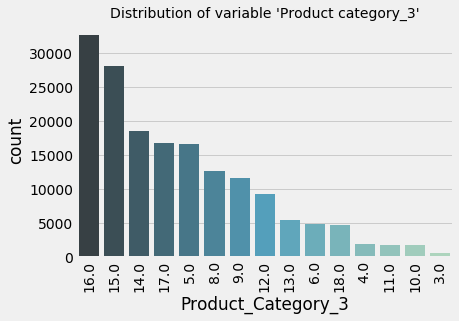

In [20]:
#sns.countplot(train.Product_Category_3)
sns.countplot(x = 'Product_Category_3',
              palette = "GnBu_d",
              data = train,
              order = train['Product_Category_3'].value_counts().index)
plt.xticks(rotation=90)
plt.title("Distribution of variable 'Product category_3'", fontsize=14)
plt.show()

In [21]:
numeric_features = train.select_dtypes(include=[np.number])

In [22]:
#correlation between numeric features and the target variable 'Purchase'
corr = numeric_features.corr()
print (corr['Purchase'].sort_values(ascending=False)[:10])

Purchase              1.000000
Occupation            0.020833
User_ID               0.004716
Marital_Status       -0.000463
Product_Category_3   -0.022006
Product_Category_2   -0.209918
Product_Category_1   -0.343703
Name: Purchase, dtype: float64


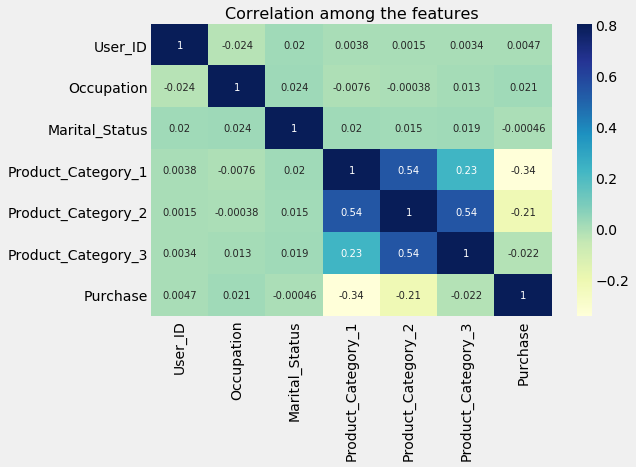

In [23]:
#correlation matrix
f, ax = plt.subplots(figsize=(8, 5))
plt.title("Correlation among the features", fontsize=16)
sns.heatmap(corr, vmax=.8,annot_kws={'size': 10}, cmap="YlGnBu", annot=True);

In [24]:
#correlation between attributes
attribute_correlation = corr.unstack()
attribute_correlation

User_ID             User_ID               1.000000
                    Occupation           -0.023971
                    Marital_Status        0.020443
                    Product_Category_1    0.003825
                    Product_Category_2    0.001529
                    Product_Category_3    0.003419
                    Purchase              0.004716
Occupation          User_ID              -0.023971
                    Occupation            1.000000
                    Marital_Status        0.024280
                    Product_Category_1   -0.007618
                    Product_Category_2   -0.000384
                    Product_Category_3    0.013263
                    Purchase              0.020833
Marital_Status      User_ID               0.020443
                    Occupation            0.024280
                    Marital_Status        1.000000
                    Product_Category_1    0.019888
                    Product_Category_2    0.015138
                    Product_Cat

### Bivariate Distribution

##### Occupation and Purchase analysis

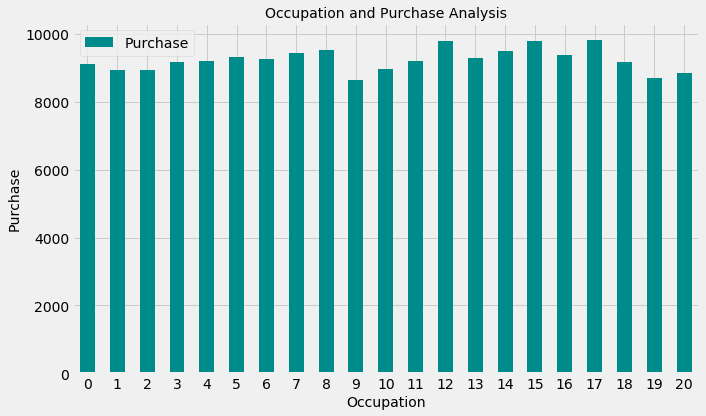

In [25]:
Occupation_pivot = train.pivot_table(index='Occupation', values='Purchase', aggfunc=np.mean)
Occupation_pivot.plot(kind='bar', color='darkcyan', figsize=(10,6))
plt.xlabel('Occupation', fontsize=14)
plt.ylabel('Purchase', fontsize=14)
plt.title('Occupation and Purchase Analysis', fontsize=14)
plt.xticks(rotation=0)
plt.show()

##### Marital Status and Purchase analysis

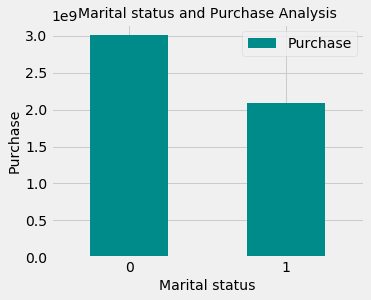

In [26]:
Marital_status_pivot = train.pivot_table(index='Marital_Status', values='Purchase', aggfunc=np.sum)
Marital_status_pivot.plot(kind='bar', color='darkcyan', figsize=(5,4))
plt.xlabel('Marital status', fontsize=14)
plt.ylabel('Purchase', fontsize=14)
plt.title('Marital status and Purchase Analysis', fontsize=14)
plt.xticks(rotation=0)
plt.show()

##### Product Category_1 and Purchase analysis

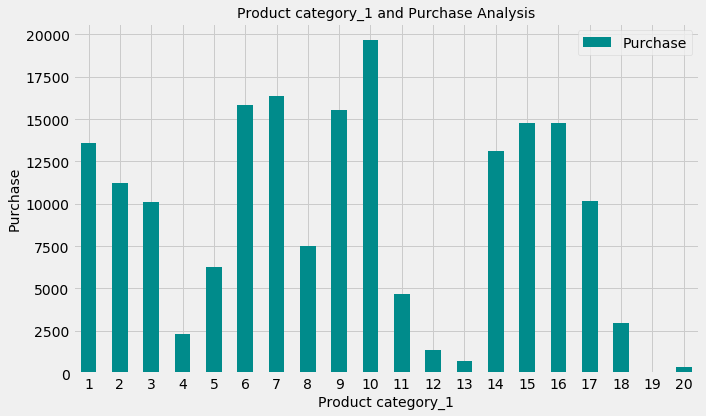

In [27]:
Product_category_1_pivot = train.pivot_table(index='Product_Category_1', values="Purchase", aggfunc=np.mean)
Product_category_1_pivot.plot(kind='bar', color='darkcyan',figsize=(10,6))
plt.xlabel("Product category_1", fontsize=14)
plt.ylabel("Purchase", fontsize=14)
plt.title("Product category_1 and Purchase Analysis", fontsize=14)
plt.xticks(rotation=0)
plt.show()

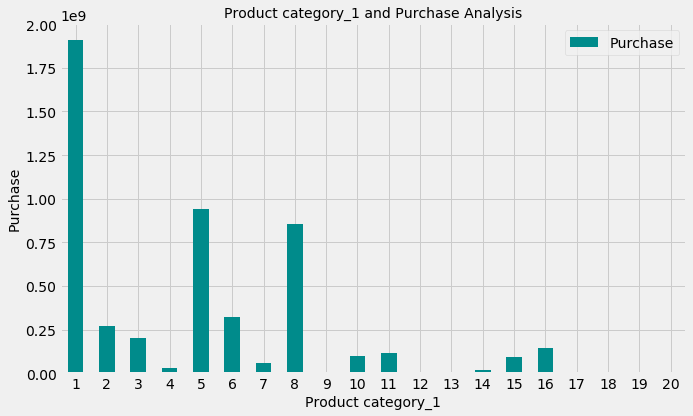

In [28]:
Product_category_1_pivot = train.pivot_table(index='Product_Category_1', values="Purchase", aggfunc=np.sum)
Product_category_1_pivot.plot(kind='bar', color='darkcyan',figsize=(10,6))
plt.xlabel("Product category_1", fontsize=14)
plt.ylabel("Purchase", fontsize=14)
plt.title("Product category_1 and Purchase Analysis", fontsize=14)
plt.xticks(rotation=0)
plt.show()

##### Product Category_2 and Purchase analysis

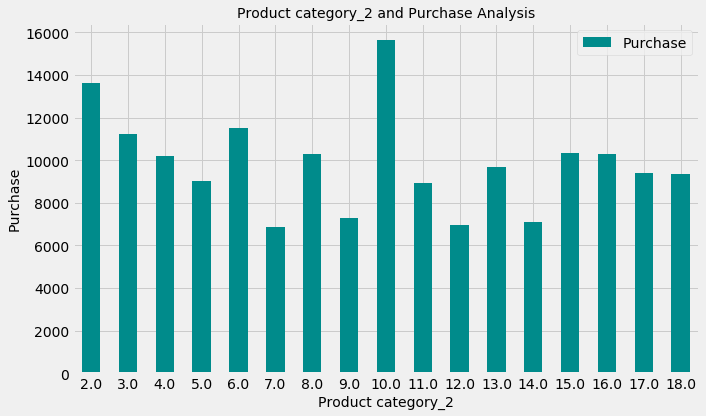

In [29]:
Product_category_2_pivot = train.pivot_table(index='Product_Category_2', values="Purchase", aggfunc=np.mean)
Product_category_2_pivot.plot(kind='bar', color='darkcyan',figsize=(10,6))
plt.xlabel("Product category_2", fontsize=14)
plt.ylabel("Purchase", fontsize=14)
plt.title("Product category_2 and Purchase Analysis", fontsize=14)
plt.xticks(rotation=0)
plt.show()

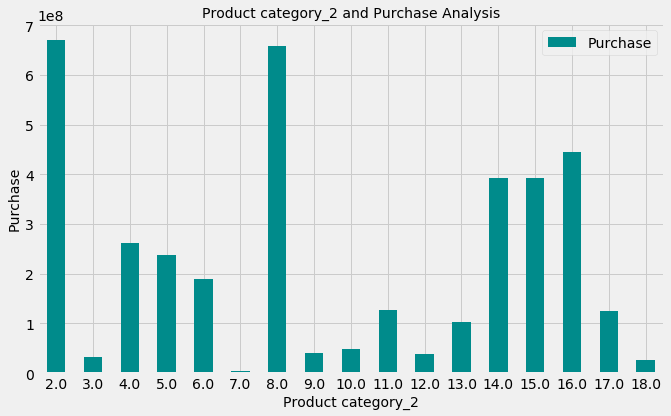

In [30]:
Product_category_2_pivot = train.pivot_table(index='Product_Category_2', values="Purchase", aggfunc=np.sum)
Product_category_2_pivot.plot(kind='bar', color='darkcyan',figsize=(10,6))
plt.xlabel("Product category_2", fontsize=14)
plt.ylabel("Purchase", fontsize=14)
plt.title("Product category_2 and Purchase Analysis", fontsize=14)
plt.xticks(rotation=0)
plt.show()

##### Product Category_3 and Purchase analysis

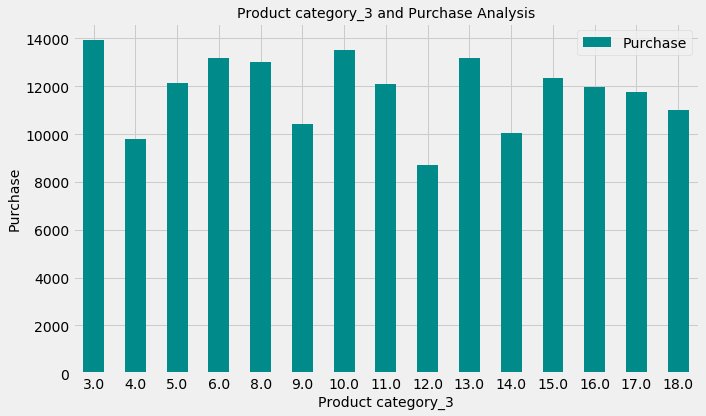

In [31]:
Product_category_3_pivot = train.pivot_table(index='Product_Category_3', values="Purchase", aggfunc=np.mean)
Product_category_3_pivot.plot(kind='bar', color='darkcyan',figsize=(10,6))
plt.xlabel("Product category_3", fontsize=14)
plt.ylabel("Purchase", fontsize=14)
plt.title("Product category_3 and Purchase Analysis", fontsize=14)
plt.xticks(rotation=0)
plt.show()

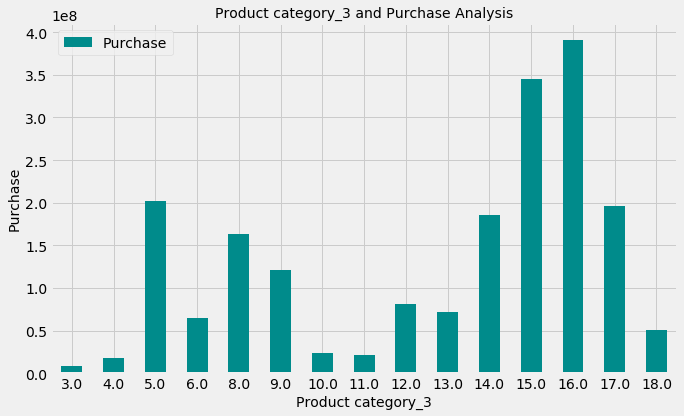

In [32]:
Product_category_3_pivot = train.pivot_table(index='Product_Category_3', values="Purchase", aggfunc=np.sum)
Product_category_3_pivot.plot(kind='bar', color='darkcyan',figsize=(10,6))
plt.xlabel("Product category_3", fontsize=14)
plt.ylabel("Purchase", fontsize=14)
plt.title("Product category_3 and Purchase Analysis", fontsize=14)
plt.xticks(rotation=0)
plt.show()

Text(0.5,1,'Average purchase by Gender')

<Figure size 720x288 with 0 Axes>

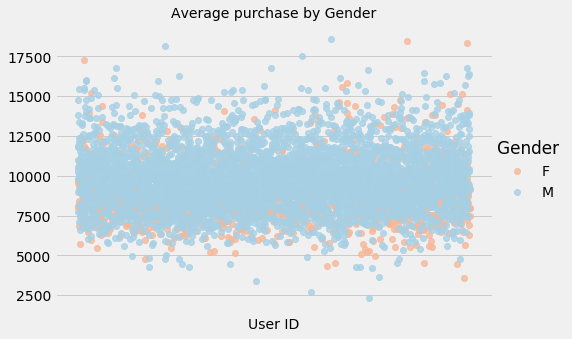

In [33]:
Avg_purchase_gender = train.groupby(['User_ID','Gender']).agg({'Purchase':np.mean}).reset_index()

plt.figure(figsize=(10,4))
sns.lmplot('User_ID','Purchase', data = Avg_purchase_gender, fit_reg=False, hue='Gender', aspect = 1.5, palette = "RdBu")
plt.xticks([])
plt.xlabel('User ID',fontsize=14)
plt.ylabel('')
plt.title('Average purchase by Gender',fontsize=14)

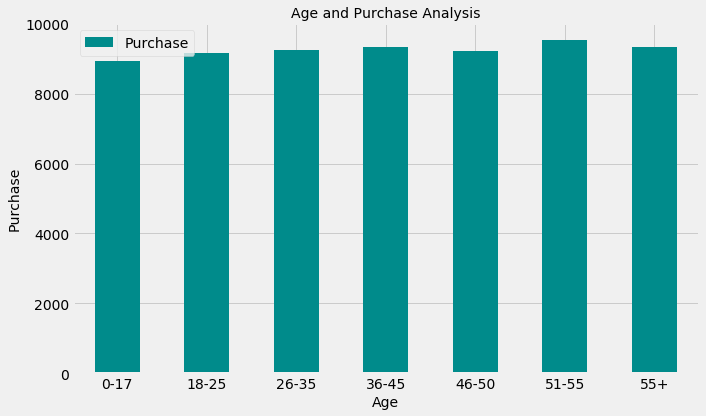

In [34]:
Avg_purchase_by_age_pivot = train.pivot_table(index='Age', values="Purchase", aggfunc=np.mean)
Avg_purchase_by_age_pivot.plot(kind='bar', color='darkcyan',figsize=(10,6))
plt.xlabel("Age", fontsize=14)
plt.ylabel("Purchase", fontsize=14)
plt.title("Age and Purchase Analysis", fontsize=14)
plt.xticks(rotation=0)
plt.show()

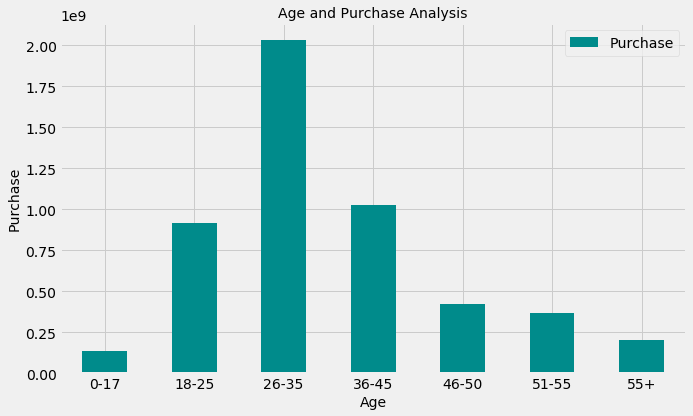

In [35]:

total_purchase_by_age_pivot = train.pivot_table(index='Age', values="Purchase", aggfunc=np.sum)
total_purchase_by_age_pivot.plot(kind='bar', color='darkcyan',figsize=(10,6))
plt.xlabel("Age", fontsize=14)
plt.ylabel("Purchase", fontsize=14)
plt.title("Age and Purchase Analysis", fontsize=14)
plt.xticks(rotation=0)
plt.show()

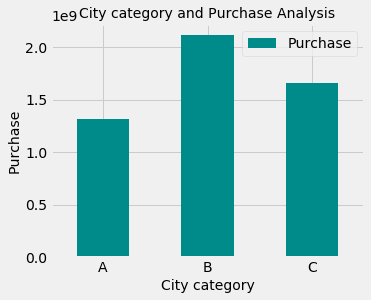

In [36]:
total_purchase_by_city_pivot = train.pivot_table(index='City_Category', values="Purchase", aggfunc=np.sum)
total_purchase_by_city_pivot.plot(kind='bar', color='darkcyan',figsize=(5,4))
plt.xlabel("City category", fontsize=14)
plt.ylabel("Purchase", fontsize=14)
plt.title("City category and Purchase Analysis", fontsize=14)
plt.xticks(rotation=0)
plt.show()

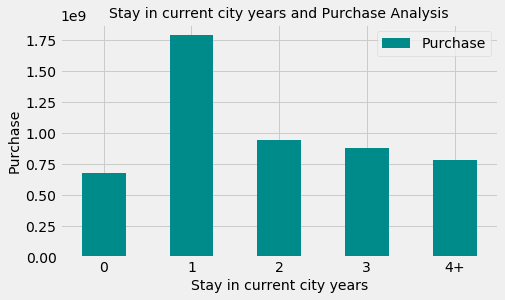

In [37]:
total_purchase_by_city_pivot = train.pivot_table(index='Stay_In_Current_City_Years', values="Purchase", aggfunc=np.sum)
total_purchase_by_city_pivot.plot(kind='bar', color='darkcyan',figsize=(7,4))
plt.xlabel("Stay in current city years", fontsize=14)
plt.ylabel("Purchase", fontsize=14)
plt.title("Stay in current city years and Purchase Analysis", fontsize=14)
plt.xticks(rotation=0)
plt.show()

In [38]:
train['combined_Gender_Marital_status'] = train.apply(lambda x:'%s_%s' % (x['Gender'],x['Marital_Status']),axis=1)
print(train['combined_Gender_Marital_status'].unique())

['F_0' 'M_0' 'M_1' 'F_1']


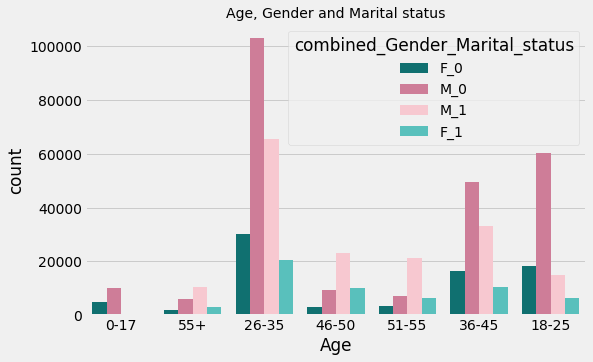

In [39]:
colors = ['#008080','#db7093','#ffc0cb', '#48d1cc']
plt.figure(figsize=(8,5))
plt.title("Age, Gender and Marital status", fontsize=14)
sns.countplot(train['Age'],hue=train['combined_Gender_Marital_status'], palette = colors)


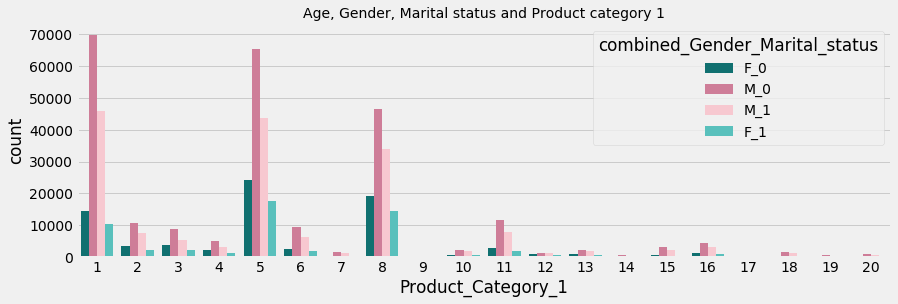

In [40]:
colors = ['#008080','#db7093','#ffc0cb', '#48d1cc']
plt.figure(figsize=(13,4))
plt.title("Age, Gender, Marital status and Product category 1", fontsize=14)
sns.countplot(train['Product_Category_1'], hue = train['combined_Gender_Marital_status'], palette = colors)

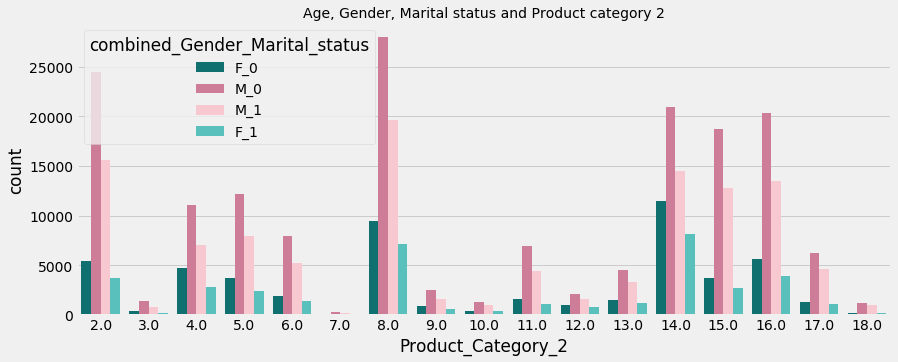

In [41]:
colors = ['#008080','#db7093','#ffc0cb', '#48d1cc']
plt.figure(figsize=(13,5))
plt.title("Age, Gender, Marital status and Product category 2", fontsize=14)
sns.countplot(train['Product_Category_2'], hue = train['combined_Gender_Marital_status'], palette = colors)

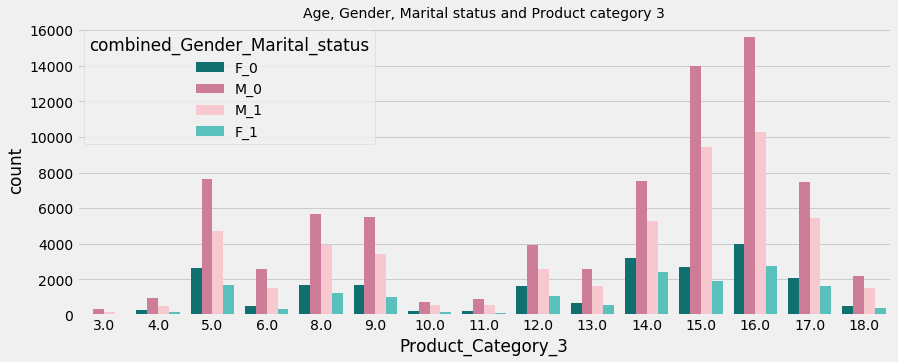

In [42]:
colors = ['#008080','#db7093','#ffc0cb', '#48d1cc']
plt.figure(figsize=(13,5))
plt.title("Age, Gender, Marital status and Product category 3", fontsize=14)
sns.countplot(train['Product_Category_3'], hue = train['combined_Gender_Marital_status'], palette = colors)

### Data Preprocessing 

In [45]:
#joining the test and train dataset
train['source'] = 'train'
test['source'] = 'test'
data = pd.concat([train, test], ignore_index = True, sort = False)
print(train.shape, test.shape, data.shape)

(550068, 14) (233599, 12) (783667, 14)
